In [177]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
from sklearn import metrics
import seaborn as sns


In [180]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#metrics
from statistics import mean
from sklearn.metrics import accuracy_score 
from sklearn.metrics import explained_variance_score as evs
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import os

In [2]:
df=pd.read_csv("churn.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# 2

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.shape

(10000, 14)

In the given features, Surname,Geography,Tenure,NumofProducts,HasCrCard,IsActiveMember,Exited are the catogorical variables

In [17]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [18]:
((df.IsActiveMember.value_counts())/10000)*100

1    51.51
0    48.49
Name: IsActiveMember, dtype: float64

In [19]:
((df.HasCrCard.value_counts())/10000)*100

1    70.55
0    29.45
Name: HasCrCard, dtype: float64

In [20]:
((df.Exited.value_counts())/10000)*100

0    79.63
1    20.37
Name: Exited, dtype: float64

In [22]:
((df.NumOfProducts.value_counts())/10000)*100

1    50.84
2    45.90
3     2.66
4     0.60
Name: NumOfProducts, dtype: float64

In [23]:
((df.Geography.value_counts())/10000)*100

France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64

In [24]:
((df.Tenure.value_counts())/10000)*100

2     10.48
1     10.35
7     10.28
8     10.25
5     10.12
3     10.09
4      9.89
9      9.84
6      9.67
10     4.90
0      4.13
Name: Tenure, dtype: float64

In [27]:
((df.Age.value_counts())/10000)*100
#Age can be considered as discrete numerical varialbe more than a categorical variable

37    4.78
38    4.77
35    4.74
36    4.56
34    4.47
      ... 
92    0.02
88    0.01
82    0.01
85    0.01
83    0.01
Name: Age, Length: 70, dtype: float64

In [28]:
((df.Surname.value_counts())/10000)*100

Smith          0.32
Martin         0.29
Scott          0.29
Walker         0.28
Brown          0.26
               ... 
Lindeman       0.01
Jimenez        0.01
Wertheim       0.01
Morres         0.01
Weatherford    0.01
Name: Surname, Length: 2932, dtype: float64

The above lines of code shows all the percentage distribution of the catagorical variable

# 3

In [30]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [31]:
df.isnull().sum().sum()

0

There are no missing values or null values in the dataset

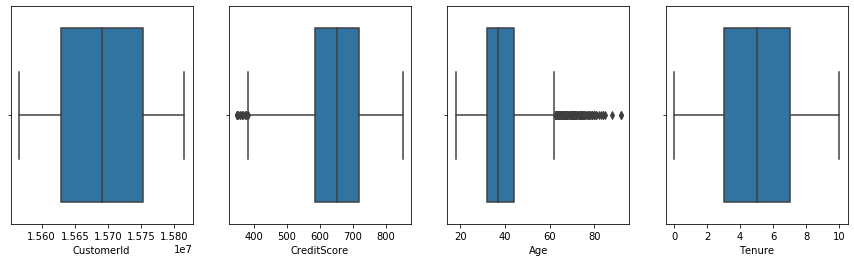

In [34]:
fig,ax = plt.subplots(1,4,figsize=(15,4))
sns.boxplot(df['CustomerId'], ax=ax[0])
sns.boxplot(df['CreditScore'], ax=ax[1])
sns.boxplot(df['Age'], ax=ax[2])
sns.boxplot(df['Tenure'], ax=ax[3])

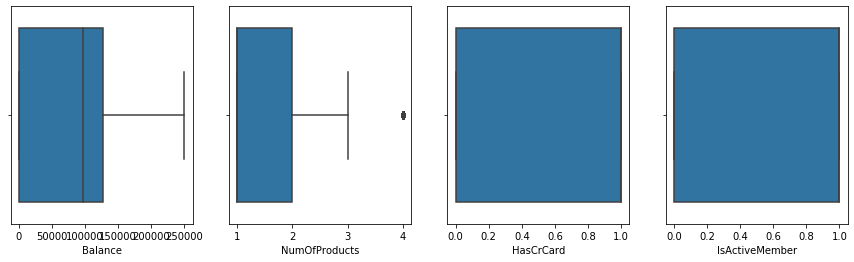

In [35]:
fig,ax = plt.subplots(1,4,figsize=(15,4))
sns.boxplot(df['Balance'], ax=ax[0])
sns.boxplot(df['NumOfProducts'], ax=ax[1])
sns.boxplot(df['HasCrCard'], ax=ax[2])
sns.boxplot(df['IsActiveMember'], ax=ax[3])

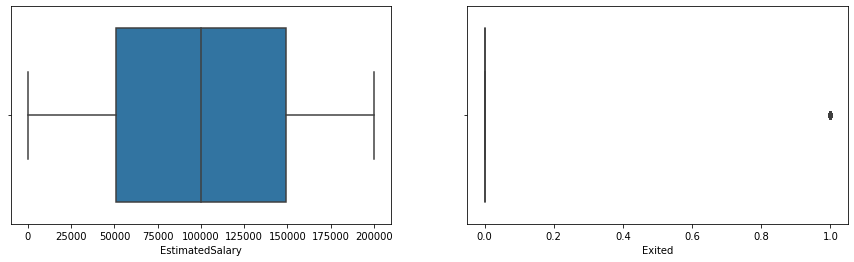

In [39]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
sns.boxplot(df['EstimatedSalary'], ax=ax[0])
sns.boxplot(df['Exited'], ax=ax[1])


The outliers exist in age and Credit Score features

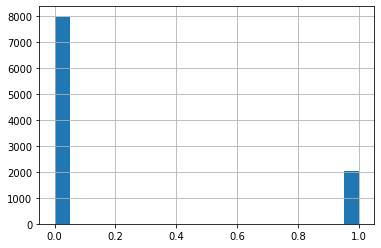

In [217]:
df['Exited'].hist(bins=20)

Hence we need to oversample the data so that we will obtain equally or evenly distributed target variable which is done below with k-fold

Target variable is not evenly distributed as we can see from the above histogram. However, i won't consider there is anything to be rectified

# 4

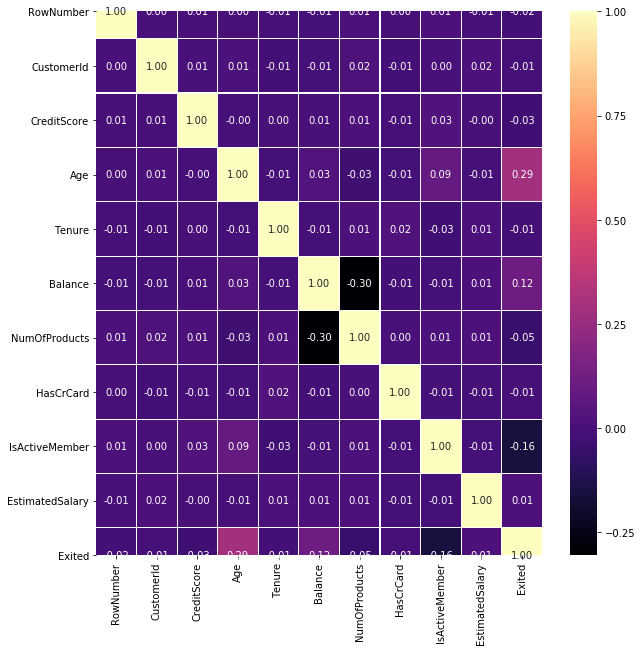

In [60]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.1, fmt= '.2f',cmap="magma")
plt.show()

#The highest correleated featuers with the target variable is Age and Balance

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


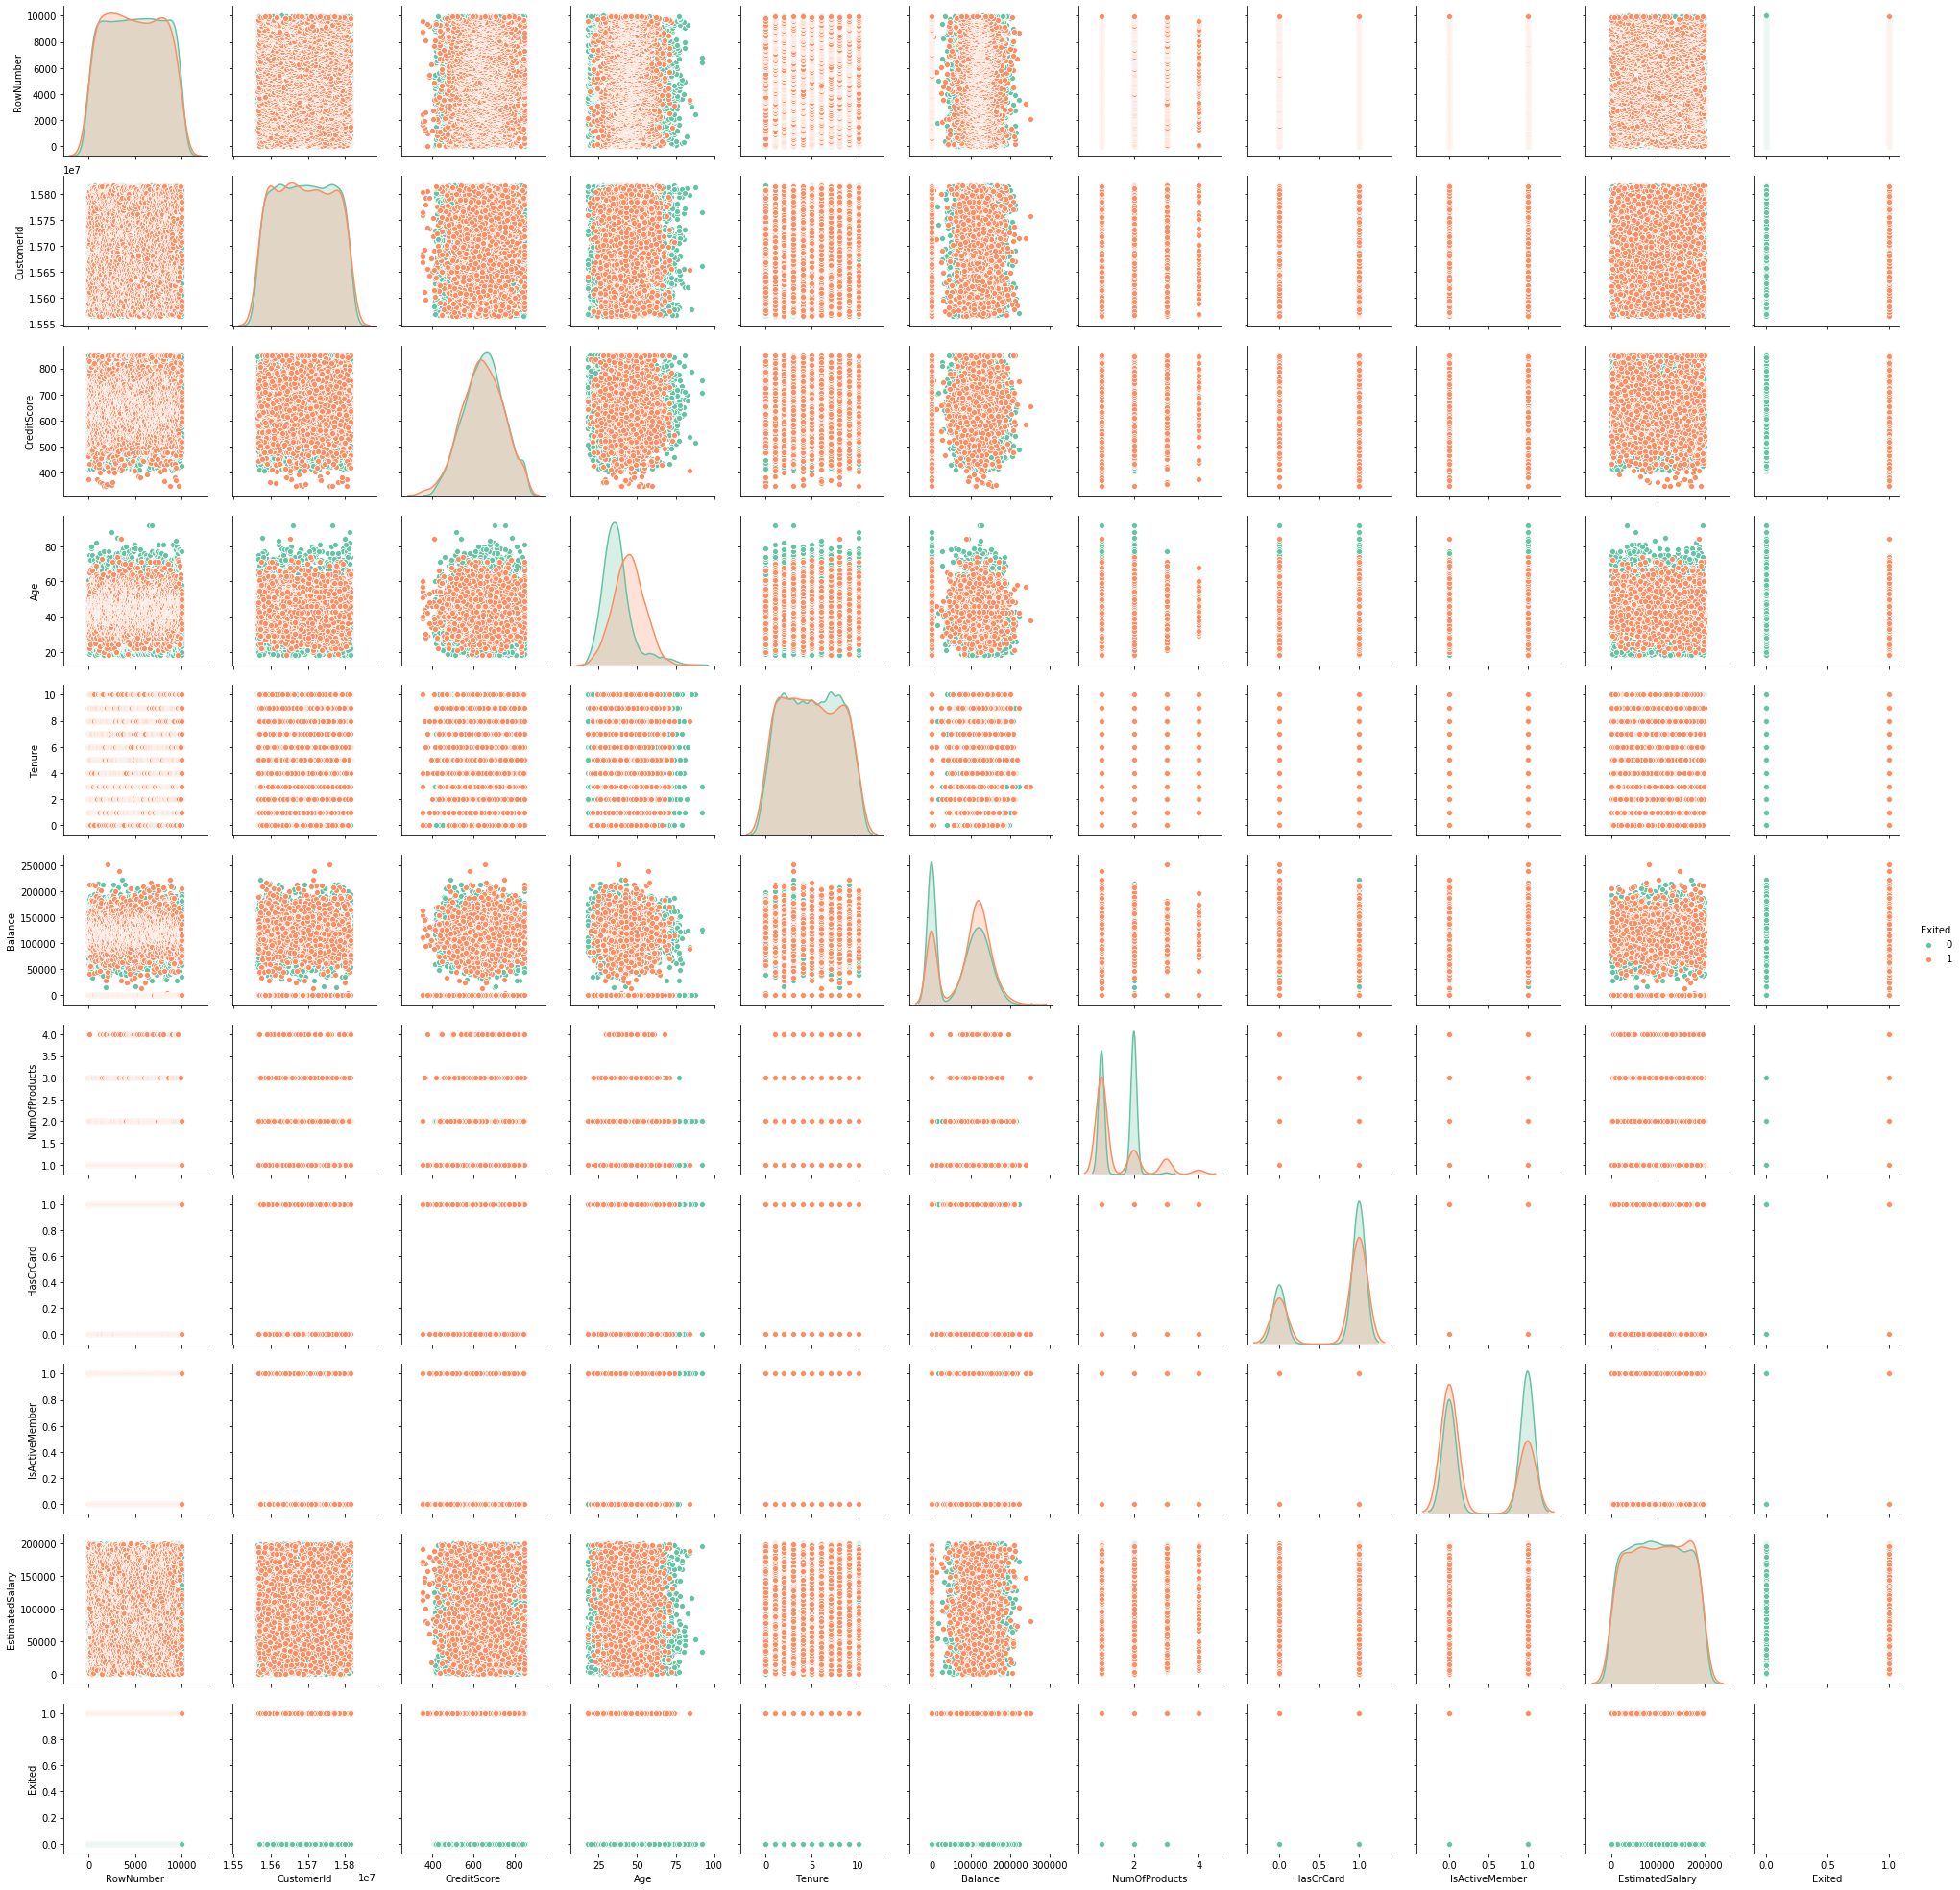

In [65]:
sns.pairplot(df,hue="Exited",palette="Set2")
plt.show()

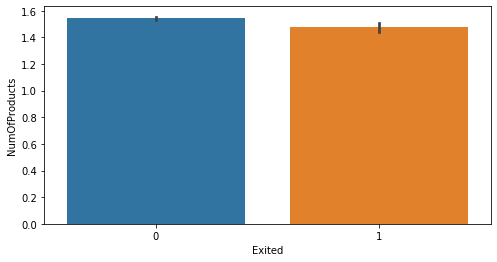

In [66]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="Exited", y="NumOfProducts", data=df)

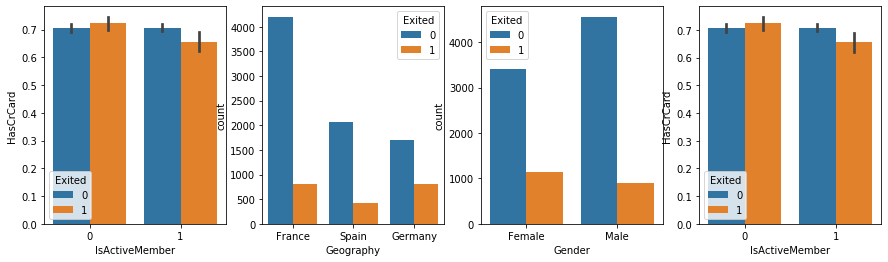

In [82]:
fig,ax = plt.subplots(1,4,figsize=(15,4))          
sns.barplot(data=df,x='IsActiveMember',y='HasCrCard',hue='Exited', ax=ax[0])
sns.countplot(data=df,x='Geography',hue='Exited', ax=ax[1])
sns.countplot(data=df,x='Gender',hue='Exited', ax=ax[2])
sns.barplot(data=df,x='IsActiveMember',y='HasCrCard',hue='Exited', ax=ax[3])

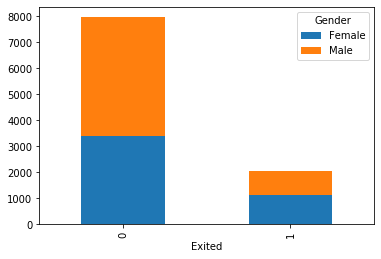

In [72]:

a=pd.crosstab(df['Exited'],df['Gender'])
a.plot(kind='bar', stacked=True)
plt.show()


Those who didn't exited the company belong to more males than female category and the reverse goes for those who exited. 

# 5

In [108]:
# df= pd.get_dummies(df, columns=['Gender'])

In [126]:
# df= pd.get_dummies(df, columns=['Geography'])

In [107]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female
0,1,15634602,Hargrave,619,France,42,2,0.00,1,1,1,101348.88,1,1
1,2,15647311,Hill,608,Spain,41,1,83807.86,1,0,1,112542.58,0,1
2,3,15619304,Onio,502,France,42,8,159660.80,3,1,0,113931.57,1,1
3,4,15701354,Boni,699,France,39,1,0.00,2,0,0,93826.63,0,1
4,5,15737888,Mitchell,850,Spain,43,2,125510.82,1,1,1,79084.10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,39,5,0.00,2,1,0,96270.64,0,0
9996,9997,15569892,Johnstone,516,France,35,10,57369.61,1,1,1,101699.77,0,0
9997,9998,15584532,Liu,709,France,36,7,0.00,1,0,1,42085.58,1,1
9998,9999,15682355,Sabbatini,772,Germany,42,3,75075.31,2,1,0,92888.52,1,0


In [153]:
a=df.drop('Surname', 1)
x=a.drop('Exited', 1)
y=df['Exited']


In [154]:
from sklearn.model_selection import train_test_split

In [193]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)

In [194]:
x_train.shape

(7000, 14)

In [195]:
x_test.shape

(3000, 14)

we check if the train test data are representative of the dataset by performing a chi-square test of independence over the catagorical coumns from both datasets. Let's take two catagorical column from test and train each and do a cross tab and then check which one performs the better.

Null Hypothesis: The test and train datasets or groups are independent
    
    
Alternate Hypothesis: The test and train datasets or groups are dependent.

In [196]:
a=pd.crosstab(df['Exited'],df['Gender_Female'])
a

Gender_Female,0,1
Exited,,
0,4559,3404
1,898,1139


In [197]:
import pandas      as pd
import numpy       as np
import scipy.stats as stats

quality_array = np.array([[3404, 4559],[1139, 898]])
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(quality_array)

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))

Chi-square statistic 112.91857 P value 0.000000 Degrees of freedom 1


###### In this example, p value is 0.0000 and < 0.05 so we reject the null hypothesis. 
###### So, we conclude that both train and test data sets are dependent and thus ascertain this statistically

# 6

In [198]:
from statsmodels.tools import add_constant as add_constant
df_constant = add_constant(df)
df_constant.head()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Geography_France,Geography_Germany,Geography_Spain
0,1.0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,1,0,0
1,1.0,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1
2,1.0,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,1,0,0
3,1.0,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,1,0,0
4,1.0,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,1


In [199]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [200]:
accuracy_score(y_test,y_pred)

0.801

The overall accuracy of the model is 79.1 which is a decent score

In [201]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
conf_matrix

,Predicted:0,Predicted:1
Actual:0,2403,0
Actual:1,597,0


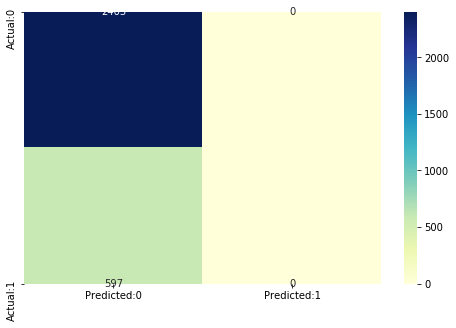

In [202]:
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [192]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2373
           1       0.00      0.00      0.00       627

    accuracy                           0.79      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.79      0.70      3000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The other output parameters that i want to look at are: 

In [244]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [245]:
print('The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)


The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.801 

 The Miss-classification = 1-Accuracy =  0.19899999999999995 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.0 

 Specificity or True Negative Rate = TN / (TN+FP) =  1.0 

 Positive Predictive value = TP / (TP+FP) =  nan 

 Negative predictive Value = TN / (TN+FN) =  0.801 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  nan 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  1.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


The above value shows the recall score , f1 score and precision of the logistic regression model and other output parameters

# 7

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

print('Not Exited', round(df['Exited'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Exited', round(df['Exited'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

x = df.drop('Exited', axis=1)
y = df['Exited']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(x, y):
    print("Train:", train_index, "Test:", test_index)
    original_xtrain, original_xtest = x.iloc[train_index], x.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]


Not Exited 79.63 % of the dataset
Exited 20.37 % of the dataset
Train: [1965 1977 1985 ... 9997 9998 9999] Test: [   0    1    2 ... 2008 2010 2011]
Train: [   0    1    2 ... 9997 9998 9999] Test: [1965 1977 1985 ... 4040 4041 4042]
Train: [   0    1    2 ... 9997 9998 9999] Test: [3840 3841 3843 ... 6033 6034 6035]
Train: [   0    1    2 ... 9997 9998 9999] Test: [5882 5887 5888 ... 8019 8020 8021]
Train: [   0    1    2 ... 8019 8020 8021] Test: [7894 7900 7909 ... 9997 9998 9999]


In [238]:

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)


Exited = df.loc[df['Exited'] == 1]
Not_Exited = df.loc[df['Exited'] == 0][:2000]

distributed_df = pd.concat([Exited, Not_Exited])

# Shuffle dataframe rows
new_df = distributed_df.sample(frac=1, random_state=42)

new_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Geography_France,Geography_Germany,Geography_Spain
5650,5651,15644882,Watson,616,36,10,78249.53,1,1,0,136934.91,0,1,0,1,0
3429,3430,15674678,Bradley,731,43,9,79120.27,1,0,0,548.52,1,1,0,1,0
4349,4350,15623107,Chukwumaobim,686,45,3,74274.87,3,1,0,64907.48,1,0,0,0,1
950,951,15630328,Bird,635,48,8,130796.33,2,1,1,43250.30,0,1,1,0,0
9076,9077,15648858,King,666,27,1,85225.21,1,0,1,64511.44,0,1,1,0,0


Distribution of the Classes in the subsample dataset
1    0.504583
0    0.495417
Name: Exited, dtype: float64


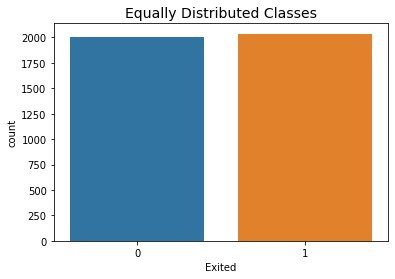

In [239]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Exited'].value_counts()/len(new_df))



sns.countplot('Exited', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [241]:
a=new_df.drop('Surname', 1)
x=a.drop('Exited', 1)
y=new_df['Exited']

In [242]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)

In [261]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred1=logreg.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [262]:
accuracy_score(y_test,y_pred)

0.6848184818481848

In [263]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
conf_matrix

,Predicted:0,Predicted:1
Actual:0,418,165
Actual:1,217,412


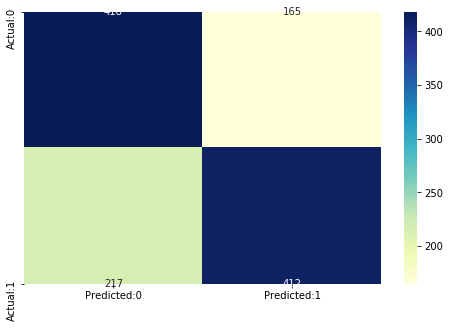

In [264]:
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [265]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.66      0.72      0.69       583
           1       0.71      0.66      0.68       629

    accuracy                           0.68      1212
   macro avg       0.69      0.69      0.68      1212
weighted avg       0.69      0.68      0.68      1212



In [266]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [275]:
print('The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)


The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.6848184818481848 

 The Miss-classification = 1-Accuracy =  0.31518151815181517 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.6550079491255962 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.7169811320754716 

 Positive Predictive value = TP / (TP+FP) =  0.7140381282495667 

 Negative predictive Value = TN / (TN+FN) =  0.658267716535433 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  2.314361420243773 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.48117312358798425


Let's try with decision tree classifier

In [252]:
giniDecisionTree = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=3, min_samples_leaf=5)

giniDecisionTree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [268]:
giniPred = giniDecisionTree.predict(x_test)

In [269]:
accuracy_score(y_test,giniPred)

0.7326732673267327

In [270]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
conf_matrix

,Predicted:0,Predicted:1
Actual:0,418,165
Actual:1,217,412


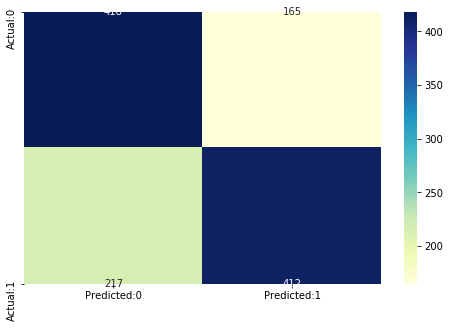

In [271]:
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [272]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.66      0.72      0.69       583
           1       0.71      0.66      0.68       629

    accuracy                           0.68      1212
   macro avg       0.69      0.69      0.68      1212
weighted avg       0.69      0.68      0.68      1212



In [273]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [274]:
print('The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)


The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.6848184818481848 

 The Miss-classification = 1-Accuracy =  0.31518151815181517 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.6550079491255962 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.7169811320754716 

 Positive Predictive value = TP / (TP+FP) =  0.7140381282495667 

 Negative predictive Value = TN / (TN+FN) =  0.658267716535433 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  2.314361420243773 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.48117312358798425


# 8

The overall fit of the model using decision tree classifier has been improved and however since there was imbalance in the data and due to undersampling technique 

Overall model could be improved with more data.

The most change that impacted is undersampling the data to make the target variable evenly distributed which improved the accuracy score, f1_score and predictions.